In [1]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Import dataset and assign labels
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Map images to classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

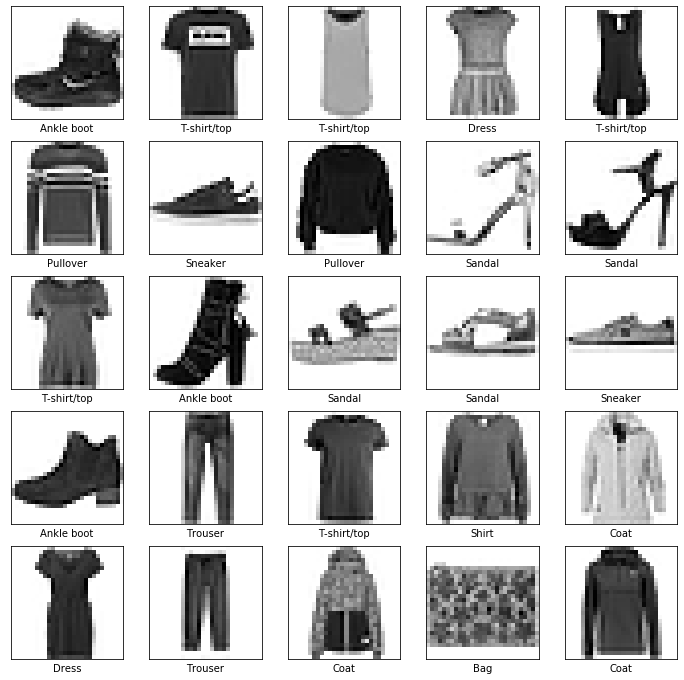

In [4]:
#Check the mapping
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
#Check train data shape
print("Train Data Shape: ", train_images.shape)

#Check test data shape
print("Test Data Shape: ", test_images.shape)

Train Data Shape:  (60000, 28, 28)
Test Data Shape:  (10000, 28, 28)


In [6]:
#Normalize the data to scale values between 0 and 1
train_images = train_images.reshape(60000,28,28,1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

In [7]:
#Define callback function to stop training when desired loss reached
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.25):
            print("\nLoss reached, cancelling training!")
            self.model.stop_training = True

In [8]:
#Instantiate the callback class
callbacks = myCallback()

In [9]:
#Design the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu,
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0809 17:05:21.214155 140689795036992 deprecation.py:506] From /home/spandan/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
#Summary of the model through convolutions and pooling
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'mse'])

In [12]:
#Train the model
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4302 - acc: 0.8425 - mean_squared_error: 27.6772
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2857 - acc: 0.8936 - mean_squared_error: 27.6846
Epoch 3/5
59680/60000 [============================>.] - ETA: 0s - loss: 0.2443 - acc: 0.9086 - mean_squared_error: 27.6901
Loss reached, cancelling training!
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2440 - acc: 0.9087 - mean_squared_error: 27.6868


In [13]:
#Evaluate the model
test_loss, test_accuracy, mse = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_accuracy)
print('Test MSE:', mse)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.2668 - acc: 0.9009 - mean_squared_error: 27.6873
Test accuracy: 0.9009
Test MSE: 27.68726


In [14]:
#Make Predictions
predictions = model.predict(test_images)

In [15]:
#Set the i'th image in the dataset to make prediction
i = 0

In [16]:
#Predict ith image
print(np.argmax(predictions[i]))

#Check if the prediction was correct
print(test_labels[i])

9
9


In [17]:
#Function to plot the i'th image  with confidence level
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(1, 28, 28, 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

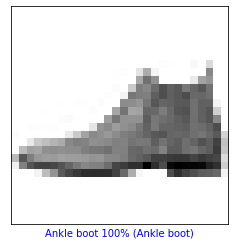

In [18]:
#Plot the i'th image with measure of confidence level
plt.figure(figsize=(6,4))
plot_image(i, predictions, test_labels, test_images)
plt.show()

In [19]:
#Function to visualize the convolutions and pooling
def visualize_convolutions(test_images, image1, image2, image3, convolutions):
    f, axarr = plt.subplots(3,4)

    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
    for x in range(0,4):
        f1 = activation_model.predict(test_images[image1].reshape(1, 28, 28, 1))[x]
        axarr[0,x].imshow(f1[0, : , :, convolutions], cmap='inferno')
        axarr[0,x].grid(False)
        f2 = activation_model.predict(test_images[image2].reshape(1, 28, 28, 1))[x]
        axarr[1,x].imshow(f2[0, : , :, convolutions], cmap='inferno')
        axarr[1,x].grid(False)
        f3 = activation_model.predict(test_images[image3].reshape(1, 28, 28, 1))[x]
        axarr[2,x].imshow(f3[0, : , :, convolutions], cmap='inferno')
        axarr[2,x].grid(False)

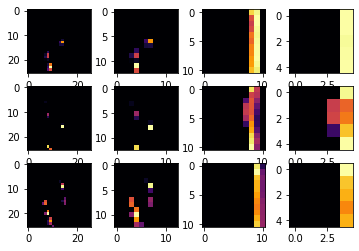

In [20]:
#Plot the convolutions and poolings to find similarities
visualize_convolutions(test_images,2,3,5,3)